In [1]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import sklearn.metrics as skm
import cupy as cp

In [2]:
def check_symmetric(a, rtol=1e-05, atol=1e-08):
    return np.allclose(a, a.T, rtol=rtol, atol=atol)

In [3]:
def get_Leig(G):
    A = nx.adjacency_matrix(G)
    A = cp.array(A.todense())
    # print(type(A), A.sum(axis=1).flatten().shape)
    N = A.shape[0]
    D = cp.diag(A.sum(axis=1).flatten())
    L = D-A
    w, Q = cp.linalg.eigh(L)
    idx = cp.argsort(w)[::-1]
    return w[idx[:]]

In [4]:
def rel_ee(w_orig, wc, k):
    sum = 0.
    for i in range(k):
        sum += (np.abs(w_orig[i] - wc[i]))/w_orig[i]
    sum /= k
    return sum

In [5]:
def sim_graph(C, theta, wG):
    K = C.shape[0]
    nA = np.where(C > theta, 1, 0)
    nA = nA - np.eye(K)
    nG = nx.from_numpy_matrix(nA)
    print("SIM", theta)
    print(nG.number_of_nodes())
    print(nG.number_of_edges())       
    wnG = get_Leig(nG)
    print(wnG[:20])
    print(10, rel_ee(wG, wnG, 10))
    print(40, rel_ee(wG, wnG, 40))
    print(80, rel_ee(wG, wnG, 80))

In [6]:
def topk_graph(C, k, wG):
    K = C.shape[0]
    idx = np.argsort(C)
    E = np.zeros((K,K))
    for i in range(K):
        E[i][idx[i][-k:]] = 1
    E = E - np.eye(K)
    eG = nx.from_numpy_matrix(E)
    print("TOPK", k)
    print(eG.number_of_nodes())
    print(eG.number_of_edges())
    weG = get_Leig(eG)
    print(weG[:20])
    print(10, rel_ee(wG, weG, 10))
    print(40, rel_ee(wG, weG, 40))
    print(80, rel_ee(wG, weG, 80))  

In [7]:
def process_context(Kin, wG, sim_thresh, topk_thresh):
    context = np.load('context_weight_'+str(Kin)+'.npy')
    print(context.shape)
    C = skm.pairwise.cosine_similarity(context)
    K = C.shape[0]
    print("r", 1-K/N, K, N)    
    plt.hist(C.flatten(), bins='auto')
    plt.show()
    sim_graph(C, sim_thresh, wG)
    topk_graph(C, topk_thresh,wG)

In [8]:
mat = loadmat('POS.mat')
matrix = mat['network']
cx = matrix.tocoo()
edgelist = zip(cx.row, cx.col)

In [9]:
G = nx.Graph()
G.add_edges_from(edgelist)
print(G.number_of_nodes())
print(G.number_of_edges())
A = nx.adjacency_matrix(G)
print(A.shape)
N = G.number_of_nodes()
check_symmetric(A.todense())

4777
92517
(4777, 4777)


True

In [10]:
wG = get_Leig(G)
print(wG[:20])

[3645.00204421 3581.00067744 3331.00151398 3033.00260464 2883.0019861
 2356.00606668 2230.00425055 2040.00528691 1380.02577461 1274.04069761
 1250.01923973 1203.016857   1127.02697271 1042.03638336  970.05633236
  938.07155887  922.08792445  915.94015376  882.00779203  810.02800882]


(2000, 4777)
r 0.5813271927988277 2000 4777


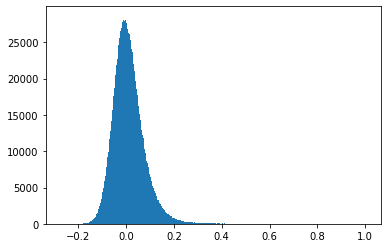

SIM 0.15
2000
62007
[456.05011462 451.04933342 420.06927327 418.06360559 413.07274248
 412.06677831 409.06837945 399.09053214 398.07950592 392.0781496
 384.0886192  378.13077699 374.13765545 373.12766722 372.08113552
 367.13553468 366.10671483 365.12467069 365.11199637 364.08465579]
10 0.8191528436622935
40 0.5212374510726845
80 0.35138675281557197
TOPK 45
2000
60057
[414.07911568 408.07821485 371.09952451 356.10171696 338.12084844
 336.11335827 329.11895839 304.14969743 295.15322862 281.17314204
 269.23509806 257.21439771 255.2185988  244.24609553 229.44643297
 223.33426387 220.48650731 218.12400579 211.32719588 207.30877798]
10 0.8552433242026544
40 0.7385146985550612
80 0.6425537448296683


In [15]:
process_context(2000, wG, 0.15, 45)

(500, 4777)
r 0.8953317981997069 500 4777


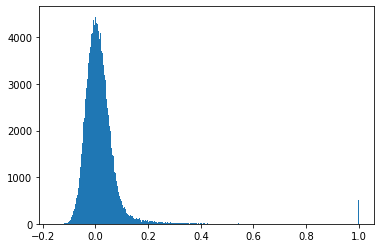

SIM 0.107
500
5114
[140.03108353 135.05736361 134.10537837 133.97901328 133.03807472
 131.04517237 130.07641869 128.15729652 128.10792298 127.80895748
 122.21427676 121.9458068  121.06927164 120.185154   119.90435714
 119.01607468 115.2379322  114.92168107 113.06591288 111.27595781]
10 0.9423366759689629
40 0.8557525287796247
80 0.7915930816506235
TOPK 14
500
5202
[124.3194344  123.97451159 119.1599785  116.15057474 111.55721684
 110.76190904 103.52524265 102.8849178   99.1193598   95.3879274
  94.68737867  82.14573414  68.23227783  67.22051351  67.00762071
  64.11791563  61.10064605  58.18363809  51.90600457  50.49445494]
10 0.952794501271897
40 0.9329557041035519
80 0.9144215928292851


In [259]:
process_context(500, wG, 0.107, 14)

(200, 4777)
r 0.9581327192798827 200 4777


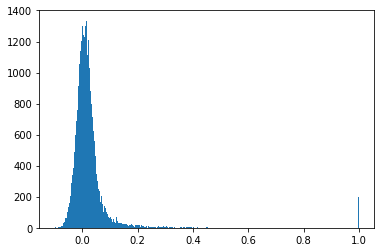

SIM 0.0345
200
4556
[128.07528712 126.07142585 123.20761875 122.95508876 121.08341467
 117.11759326 116.19243835 115.98778775 115.20427407 114.89317663
 112.08821115 109.13360687 108.12614032 107.12724218 106.34382748
 106.24089759 105.6862951  104.0433746  101.11924063  98.19867041]
10 0.9477799910348403
40 0.8741047263816888
80 0.8283531572574091
TOPK 32
200
4789
[133.23880728 132.9868879  129.1167232  127.14408093 126.10003836
 122.12421418 120.14093442 119.14138822 118.08893785 113.30612488
 113.01258178 107.282237   106.2312534  105.16398315 103.26455225
 102.49942759 102.15044276 100.80409024  97.13992768  86.49497584]
10 0.9463270814820864
40 0.8910763228280649
80 0.8597545198099603


In [319]:
process_context(200, wG, 0.0345, 32)
#process_context(200, wG, 0.0275, 40)

2000
26632


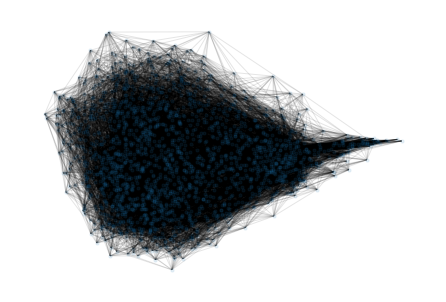

In [155]:
pos = nx.nx_agraph.pygraphviz_layout(eG, prog='neato')  
#nx.draw(eG, pos=pos, node_size=10, alpha=0.1)
nx.draw_spectral(eG, node_size=10, alpha=0.1)
plt.draw()

In [320]:
def map_graph(Kin, wG, A):
    context = np.load('context_weight_'+str(Kin)+'.npy')
    print(context.shape)
    A = A.todense()
    nA = A/np.linalg.norm(A, axis=1,keepdims=True)
    nC = context/np.linalg.norm(context, axis=1,keepdims=True)
    print("norm", np.linalg.norm(nA[0,:]), np.linalg.norm(nC[0,:]))
    prod = (nC @ nA).T
    print(prod.shape)
    v2K = np.ravel(np.argmax(prod, axis=1))
    print(v2K.shape)
    W = np.zeros((Kin,Kin))
    print("A", A.shape)
    for i in range(N):
        for j in range(N):
            if A[i,j]:
                Ki = v2K[i]
                Kj = v2K[j]
                W[Ki,Kj]=1
                W[Kj,Ki]=1
    np.fill_diagonal(W, 0)
    eG = nx.from_numpy_matrix(W)
    print(eG.number_of_nodes())
    print(eG.number_of_edges())
    weG = get_Leig(eG)
    print(weG[:20])
    print(10, rel_ee(wG, weG, 10))
    print(40, rel_ee(wG, weG, 40))
    print(80, rel_ee(wG, weG, 80))
    return eG

In [321]:
gG = map_graph(200, wG, A)

(200, 4777)
norm 0.9999999999999977 1.0
(4777, 200)
(4777,)
A (4777, 4777)
200
5714
[200.         199.00023181 199.         198.0006611  195.00134598
 192.00193528 186.00558679 177.01792407 176.00880562 169.03020514
 168.00831486 153.20588136 152.88884739 145.20591679 144.92312034
 143.0206305  131.35494731 131.00647353 130.03045936 128.05751962]
10 0.9185005954639118
40 0.851752512405603
80 0.8070607040213084


<class 'networkx.classes.graph.Graph'>


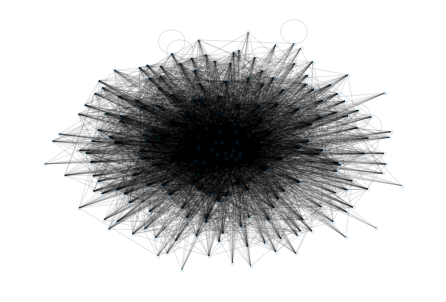

In [318]:
print(type(gG))
pos = nx.nx_agraph.pygraphviz_layout(gG, prog='neato')  
nx.draw(gG, pos=pos, node_size=10, alpha=0.1)
#nx.draw_spectral(gG, node_size=10, alpha=0.1)
plt.draw()

In [322]:
map_graph(500, wG, A)

(500, 4777)
norm 0.9999999999999977 1.0
(4777, 500)
(4777,)
A (4777, 4777)
500
12843
[486.         468.00078578 451.00289164 448.00146328 439.00232525
 401.00911974 378.01546513 365.05225637 363.99602545 360.0398369
 358.95640993 336.01181292 295.03297338 262.13912575 260.97626119
 252.04753004 236.08341507 225.10178135 220.13537459 218.10617332]
10 0.8235575330459136
40 0.7522131446503473
80 0.7166273926544762


In [323]:
map_graph(2000, wG, A)

(2000, 4777)
norm 0.9999999999999977 0.99999994
(4777, 2000)
(4777,)
A (4777, 4777)
2000
22768
[1494.00000407 1418.00025715 1285.00133574 1253.00053593  843.00800238
  678.01708062  606.02951651  590.00508213  433.04390774  363.06073221
  290.11880211  265.1615863   250.19584876  241.19331794  235.17089775
  228.83191296  227.25682971  207.17326777  196.22771618  191.98803576]
10 0.6655322762541045
40 0.7254279396424227
80 0.7076490364001755


In [240]:
def process_coarsen(Kin):
    W = np.load('Gc_'+str(Kin)+'.npy')
    nG = nx.from_numpy_matrix(W)
    print(nG.number_of_nodes())
    print(nG.number_of_edges())       
    wnG = get_Leig(nG)
    print(wnG[:20])
    print(10, rel_ee(wG, wnG, 10))
    print(40, rel_ee(wG, wnG, 40))
    print(80, rel_ee(wG, wnG, 80))

In [275]:
process_coarsen(2000)

2000
65558
[3659.66595857 3595.67129567 3368.59456093 3054.53052084 2908.44065725
 2372.32952179 2245.33702097 2053.22961102 1598.70548351 1415.05473556
 1287.94267562 1267.95711525 1218.14091902 1174.22322179 1158.61580802
 1100.01493376 1054.89936651  991.30386328  972.29590493  949.57770946]
10 0.03247569122977472
40 0.20282447239288706
80 0.28092554672461223


In [274]:
process_coarsen(500)

501
21259
[6997.68090726 6031.38802652 5949.91415952 3715.85855434 2898.99306664
 2766.48402074 2718.14977135 2410.99092915 2333.48873424 2239.48066391
 2204.58154442 2100.75454592 1946.75014734 1848.15767184 1822.62507064
 1754.19261105 1715.45739055 1657.9157495  1646.46612838 1603.35586148]
10 0.4644649068115457
40 1.1324639449629748
80 1.6464903608860966


In [260]:
process_coarsen(200)

201
4739
[7513.87926756 7408.49323265 7091.42015494 6660.22572957 6328.24717136
 6227.06630314 6108.65468577 5659.60292933 5268.26891002 5108.20356243
 4655.83932696 4543.22008325 4364.14708419 4313.37011166 4209.88241032
 4108.40868223 3808.35714781 3707.42914435 3542.39351263 3348.46226938]
10 1.6633742505712046
40 2.6007961174850664
80 1.7589790330135997
